# Scraping: H&M Sales

**It's officially hot outside**, which means we need some summertime clothes. We live in New York City, though, so all our money goes to rent: we need to shop *as cheaply as possible*. So let's shop [sales at H&M](http://www.hm.com/us/products/sale)!

**Answer the questions below using either Men's or Women's sale items at H&M.**

## Preparation: knowing your tags

### What is the tag name and class name for a product?

In [ ]:
#tag_name = <div> class = "product-list-item"

### What is the tag name and class name for the old price? The new price?

In [ ]:
#original_price = <span> class = "old_price"
#new_price = <span> class = "price"

### What is the tag name and class name for the link to the product page?

In [ ]:
#link_productpage = <href> class="product-link" 

In [ ]:
#The path:
#<a class="product-link product-highlight js-product-link product-emphasis e-hide-on-small-screens" 
#href="/us/products/sale" data-category="products/sale">View all</a>

## Setup: Import what you'll need to scrape the page

Use `requests`, not `urllib`.

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

## Try to scrape the page: how many product names can you find?

"Try" to do it, because it *will not work.* Once you've learned that it won't work, spend a few minutes **looking at the page code** to see if you can figure out why.

Eventually, ask for help by writing on the board.

In [2]:
response = requests.get("http://api.hm.com/v2/us/en/products/display?categories=sale&concealCategories=true&pageSize=60&page=1&deviceType=DESKTOP")
data = response.json()

In [ ]:
articles = data['displayArticles']

In [5]:
names = []
for article in articles:
    name = article['name']
    names.append(name)
print(names)
len(names)

['Jersey Top', 'Pajama Tank Top and Shorts', 'Jersey Top', 'Super-slim-fit Pants', 'Jersey Top', 'Super-slim-fit Pants', 'Super-slim-fit Pants', 'Jersey Top', 'Short-sleeved Shirt Slim fit', 'Wide-cut Top', 'Printed Sweatshirt', 'Wide-cut Top', 'Cotton Blouse', 'Slim-fit Treggings', 'Top with Lace Yoke', 'Fine-knit Cardigan', 'T-shirt with Printed Design', 'Super-slim-fit Pants', 'Short-sleeved Top', 'Pajama Set with Top and Shorts', '2-pack Push-up Bras', 'Pajama Tank Top and Shorts', 'V-neck Blouse', 'Suit Pants', 'Denim Joggers', 'Lyocell Jacket', 'T-shirt with Printed Design', 'Jersey Top', '2-pack T-shirts Slim fit', 'T-shirt with Printed Design', 'Jersey Biker Leggings', 'Super Skinny High Jeans', 'Wide-cut Top', '5-pack Ankle Socks', 'Nepped T-shirt', 'Short-sleeved Shirt Slim fit', '2-pack Push-up Bras', 'Small Shoulder Bag', 'Slim-fit Leggings', 'Linen-blend Suit Pants', 'Denim Skirt', 'Crinkled Kimono', 'Short-sleeved Top', 'Flannel Shirt', 'Short T-shirt', 'Slub Jersey T-shi

60

## URLs

### What is the URL for data about on-sale men's clothing?

In [6]:
url_men = ("http://api.hm.com/v2/us/en/products/display?categories=sale%2Fmen&concealCategories=true&pageSize=60&page=1&deviceType=DESKTOP")

### What is the URL for data about on-sale women's clothing?

In [7]:
url_women = ("http://api.hm.com/v2/us/en/products/display?categories=sale%2Fladies&concealCategories=true&pageSize=60&page=1&deviceType=DESKTOP")

### What is the URL for data about on-sale women's tops?

In [8]:
url_women_top = ("http://api.hm.com/v2/us/en/products/display?categories=sale%2Fladies%2Ftops&concealCategories=true&pageSize=60&page=1&deviceType=DESKTOP")

### What changes about the url based on what you're looking for?

In [ ]:
# the sub-link to the new sub-criteria

## Request on-sale women's tops.

### How many results do you get?

In [ ]:
response = requests.get(url_women_top)
data = response.json()

### How many total results are there? How do you change the URL to get more?

There are a few ways to change the URL to: there is one very easy way and one a-little-difficult way.

In [9]:
articles = data['displayArticles']
names = []
for article in articles:
    name = article['name']
    names.append(name)
len(names)

60

In [10]:
names = []
page_number = 1

In [11]:
while True:
    url_women_top = ("http://api.hm.com/v2/us/en/products/display?"+\
                    "categories=sale%2Fladies%2Ftops&concealCategories=true&pageSize=60&page="\
                    +str(page_number)+"&deviceType=DESKTOP")
    response = requests.get(url_women_top)
    data = response.json()
    if data['displayArticles']:
        articles = data['displayArticles']
        for article in articles:
            name = article['name']
            names.append(name)
            print(name)
        page_number += 1
    else:
        break;

Short-sleeved Top
Short-sleeved Top
Short-sleeved Top
Short-sleeved Top
Jersey Top
Jersey Top
Jersey Top
Jersey Top
T-shirt with Printed Design
T-shirt with Printed Design
T-shirt with Printed Design
Striped Jersey Top
Crêped Camisole Top
Crêped Camisole Top
Jersey Top
Crêped Camisole Top
Short-sleeved Top
Pleated Top
Pleated Top
Boat-neck Top
Top with Lace Details
Top with Lace
Top with Lace Details
Long-sleeved Top
Long-sleeved Top
Long-sleeved Top
Long-sleeved Top
Top with Lace
Top with Lace Yoke
Mock-turtleneck Top
Slub Jersey Top
Slub Jersey Top
Slub Jersey Top
Ribbed Top
Ribbed Top
Wide-cut Top
Wide-cut Top
Jersey Top
Wide-cut Top
Nepped T-shirt
Short-sleeved Top
Short T-shirt
Tank Top with Lacing
Lyocell Top
T-shirt with Motif
Nepped T-shirt
Short Jersey Tank Top
Lyocell Jersey Tank Top
Long-sleeved Top
T-shirt with Printed Design
Off-the-shoulder Top
Lyocell Top
Blouce with Lace Yoke
Linen Scoop-neck Top
Polo Shirt
Wide-cut T-shirt
Long T-shirt
Short T-shirt
T-shirt with Motif


In [13]:
len(names)

355

### Download all on-sale women's tops and save them to a CSV.

I want this CSV to include

- Name
- Product code/number
- Old price
- On-sale price
- Item's URL

In [14]:
products = []
page_number = 1

while True:
    url_women_top = ("http://api.hm.com/v2/us/en/products/display?"+\
                    "categories=sale%2Fladies%2Ftops&concealCategories=true&pageSize=60&page="\
                    +str(page_number)+"&deviceType=DESKTOP")
    response = requests.get(url_women_top)
    data = response.json()
    if data['displayArticles']:
        articles = data['displayArticles']
        for article in articles:
            current = {}
            current['Name'] = article['name']
            current['Product code'] = article['productNumber']
            current['Old price'] = article['priceInfo']['formattedOldPrice']
            current['New price'] = article['priceInfo']['formattedPrice']
            current['URL'] = article['webUrl']
            products.append(current)
        page_number += 1
    else:
        break;

In [15]:
df = pd.DataFrame(products)
df.to_csv('HM_prices.csv', index=False)

## Analyzing on-sale items

### Read in the on-sale CSV and make sure the data looks right

In [16]:
df = df.from_csv('HM_prices.csv')
df

,New price,Old price,Product code,URL
Name,,,,
Short-sleeved Top,$6.99,$9.99,65274,http://www.hm.com/us/product/65274?article=652...
Short-sleeved Top,$6.99,$9.99,65274,http://www.hm.com/us/product/65274?article=652...
Short-sleeved Top,$6.99,$9.99,65274,http://www.hm.com/us/product/65274?article=652...
Short-sleeved Top,$6.99,$9.99,65274,http://www.hm.com/us/product/65274?article=652...
Jersey Top,$5,$12.99,60133,http://www.hm.com/us/product/60133?article=601...
Jersey Top,$5,$12.99,60133,http://www.hm.com/us/product/60133?article=601...
Jersey Top,$5,$12.99,60133,http://www.hm.com/us/product/60133?article=601...
Jersey Top,$5.99,$12.99,68934,http://www.hm.com/us/product/68934?article=689...
T-shirt with Printed Design,$5.99,$12.99,63019,http://www.hm.com/us/product/63019?article=630...


### Convert the prices to numbers, if you haven't already

In [17]:
df['New price'] = df['New price'].str.replace('$', '')
df['Old price'] = df['Old price'].str.replace('$', '')

### What is the average on-sale price of a women's top? Make a histogram, too, please.

The average on-sale price is $ 11.21


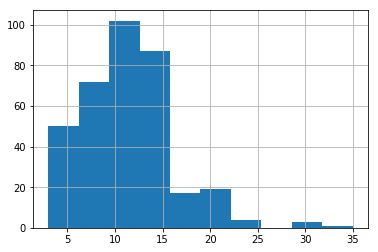

In [18]:
%matplotlib inline
print("The average on-sale price is $",round(df['New price'].astype(float).mean(),2))
df['New price'].astype(float).hist()

### What is the average discount between full price and on sale? Histogram too, please.

The average discount is $ 8.56


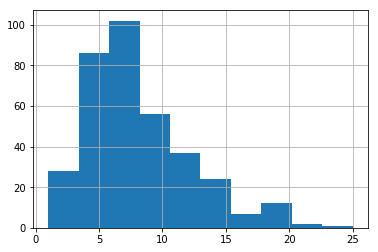

In [19]:
discount_dollar = df['Old price'].astype(float)-df['New price'].astype(float)
print("The average discount is $",round(discount_dollar.mean(),2))
(df['Old price'].astype(float)-df['New price'].astype(float)).hist()

### What is the average discount as a percentage of the full price? Histogram too, please.

The average discount is 42.59 per cent


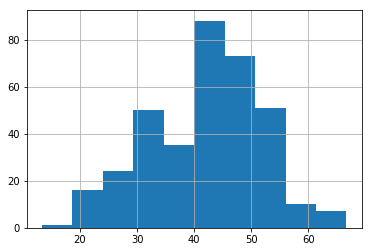

In [20]:
discount_percentage = (df['Old price'].astype(float)-df['New price'].astype(float))/df['Old price'].astype(float)*100
print("The average discount is",round(discount_percentage.mean(),2),"per cent")
((df['Old price'].astype(float)-df['New price'].astype(float))/df['Old price'].astype(float)*100).hist()

## Shopping the sales

### How many items are over 50% off?


In [21]:
discount = (df['Old price'].astype(float)-df['New price'].astype(float))/df['Old price'].astype(float)*100
print(df[discount>50]['Product code'].count(),"items are over 50% off")

91 items are over 50% off


### Display all items above 50% off.

Pandas doesn't want to show you every row. Change its settings so it will display up to **200 rows of content.**

In [22]:
pd.options.display.max_rows = 200
df[discount>50]

,New price,Old price,Product code,URL
Name,,,,
Jersey Top,5,12.99,60133,http://www.hm.com/us/product/60133?article=601...
Jersey Top,5,12.99,60133,http://www.hm.com/us/product/60133?article=601...
Jersey Top,5,12.99,60133,http://www.hm.com/us/product/60133?article=601...
Jersey Top,5.99,12.99,68934,http://www.hm.com/us/product/68934?article=689...
T-shirt with Printed Design,5.99,12.99,63019,http://www.hm.com/us/product/63019?article=630...
T-shirt with Printed Design,5.99,12.99,63019,http://www.hm.com/us/product/63019?article=630...
T-shirt with Printed Design,5.99,12.99,63019,http://www.hm.com/us/product/63019?article=630...
Crêped Camisole Top,7,17.99,65300,http://www.hm.com/us/product/65300?article=653...
Crêped Camisole Top,7,17.99,65300,http://www.hm.com/us/product/65300?article=653...
